![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [2]:
df_not_full = df[df['size'] == 'Площадьземли:1сот']
df_not_full = df_not_full.append(df[df['price'] == 'Договорная'])


In [3]:
df = df[df['size'] != 'Площадьземли:1сот']
df = df[df['price'] != 'Договорная']
df['size'] = df['size'].astype(float)
df['price'] = df['price'].astype(float)
df = df[df['size']<175]
df = df[df['price']<175000]
df = df[df['level']<13]
df = df[df['max_levels']<13]
df = df[df['size']>10]
df = df[df['price']>5000]

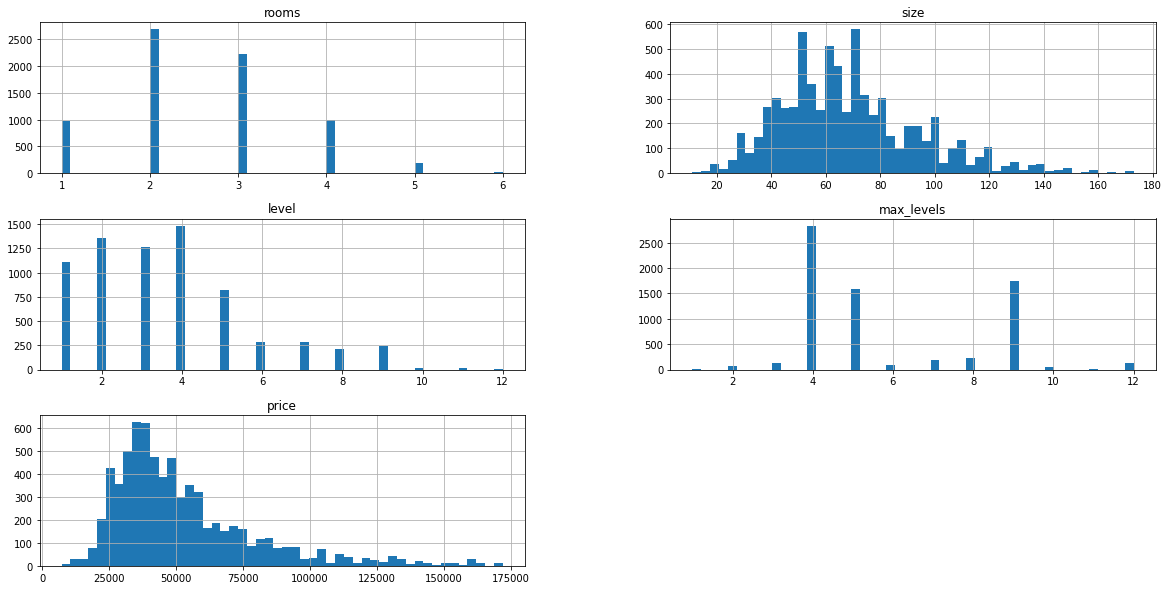

In [4]:
%matplotlib inline
df.hist(figsize=(20,10),bins=50)
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7091 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7091 non-null   object 
 1   district    7091 non-null   object 
 2   rooms       7091 non-null   int64  
 3   size        7091 non-null   float64
 4   level       7091 non-null   int64  
 5   max_levels  7091 non-null   int64  
 6   price       7091 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 443.2+ KB


In [7]:
df['size'] = df['size'].astype(int)
df['price'] = df['price'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7091 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7091 non-null   object
 1   district    7091 non-null   object
 2   rooms       7091 non-null   int64 
 3   size        7091 non-null   int64 
 4   level       7091 non-null   int64 
 5   max_levels  7091 non-null   int64 
 6   price       7091 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 443.2+ KB


In [9]:
df.describe()

,rooms,size,level,max_levels,price
count,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000
mean,2.550557,68.414187,3.612890,5.857002,52720.058243
std,1.001031,25.441347,2.097093,2.322606,27175.613917
min,1.000000,11.000000,1.000000,1.000000,7300.000000
25%,2.000000,50.000000,2.000000,4.000000,34500.000000
50%,2.000000,65.000000,3.000000,5.000000,45000.000000
75%,3.000000,80.000000,5.000000,9.000000,63000.000000
max,6.000000,173.000000,12.000000,12.000000,172000.000000


In [10]:
df.corrwith(df['price'])

rooms         0.599688
size          0.780293
level         0.054128
max_levels    0.257314
price         1.000000
dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
y = train_set['price'].copy()

In [13]:
housing = train_set.copy()
housing.drop('location', axis=1, inplace=True)
housing.drop('price', axis=1, inplace=True)


In [14]:
housing.head()

,district,rooms,size,level,max_levels
3190,Яшнободский,1,30,3,3
6449,Учтепинский,2,48,4,4
5548,Юнусабадский,2,56,4,4
2351,Мирзо-Улугбекский,1,30,5,5
5478,Юнусабадский,2,56,4,4


In [15]:
housing_cat = housing[['district']]
housing_num = housing.drop("district", axis=1)

In [16]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
from sklearn.preprocessing import StandardScaler
housing_num = housing.drop("district", axis=1)
standart_scaler = StandardScaler()
standart_scaler.fit_transform(housing_num)

array([[-1.54737979, -1.50951576, -0.29380775, -1.22786674],
       [-0.54283153, -0.7966945 ,  0.18205677, -0.79790871],
       [-0.54283153, -0.47988505,  0.18205677, -0.79790871],
       ...,
       [ 2.47081326,  1.65857874, -0.29380775, -0.36795068],
       [-1.54737979, -1.50951576, -0.76967227, -0.79790871],
       [ 0.46171673,  0.86655511, -1.24553679,  1.35188143]])

In [18]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())             
])

In [19]:
list(housing_num)

['rooms', 'size', 'level', 'max_levels']

In [21]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [22]:
X_prepared = full_pipeline.fit_transform(housing)

In [23]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [24]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [28]:
X_test = test_set.drop('price', axis=1)
X_test = X_test.drop('location',axis=1
                     )

In [26]:
y_test = test_set['price'].copy()
y_test

2959     37000
3827     55000
743      39000
980     165000
7459     36200
         ...  
1892     23600
3203    150000
5759     35000
6513     30000
5501     94000
Name: price, Length: 1419, dtype: int64

In [29]:
X_test_prepared = full_pipeline.transform(X_test)

In [30]:
y_predicted = LR_model.predict(X_test_prepared)

In [31]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)


16275.256264289992


In [32]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)


DecisionTreeRegressor()

In [33]:
y_predicted = Tree_model.predict(X_test_prepared)

In [34]:
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

17513.370697591246


In [35]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [36]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

14256.935756377045


In [37]:
import pickle

filename = 'RF_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(RF_model, file)

In [38]:
import joblib
filename = 'pipeline.jbl'
joblib.dump(full_pipeline, filename)

['pipeline.jbl']

In [57]:
df_not_full.index = np.arange(1, len(df_not_full) + 1)
df_not_full.head()

,location,district,rooms,size,level,max_levels,price
1,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119,3,9,NaN
2,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160,4,9,NaN
3,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105,5,6,NaN
4,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90,6,8,NaN
5,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48,4,4,NaN


In [58]:
X_test = df_not_full.drop('price', axis=1)
X_test = X_test.drop('location',axis=1)


In [59]:
X_test_prepared = full_pipeline.transform(X_test)

In [64]:
y_predicted = RF_model.predict(X_test_prepared)
df_price = pd.DataFrame(y_predicted)
df_price.head()

,0
0,119262.510000
1,144959.170000
2,93405.970000
3,66575.739048
4,31169.655345


In [65]:
df_price.index = np.arange(1, len(df_price) + 1)

In [66]:
df_not_full['price'] = df_price[0]
df_not_full

,location,district,rooms,size,level,max_levels,price
1,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119,3,9,119262.510000
2,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160,4,9,144959.170000
3,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105,5,6,93405.970000
4,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90,6,8,66575.739048
5,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48,4,4,31169.655345
...,...,...,...,...,...,...,...
95,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.70,3,8,18669.141000
96,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51,3,4,29626.116730
97,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6,208,1,7,139969.960000
98,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,2,35,2,9,22621.296667


In [53]:
df_price = df_price.rename(columns={0:'price'})
df_not_full['price'] = df_price['price']
df_not_full.head()

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119,3,9,NaN
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160,4,9,NaN
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105,5,6,NaN
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90,6,8,NaN
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48,4,4,NaN


In [69]:
df_full = df.append(df_not_full)

In [72]:
df_full.index = np.arange(0, len(df_full))

In [73]:
df_full.to_csv('Toshkent_uy_narxlari',index=False)